In [78]:
## Project Implementation-- Sara Joneydi
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

In [79]:
## Data Pre processing:
data = pd.read_csv('data.csv')
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [80]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [81]:
data['diff_symp_hos'] = data['hosp_vis']-data['sym_on']

In [82]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [83]:
print(data.dtypes)

location           int64
country            int64
gender             int64
age              float64
vis_wuhan          int64
from_wuhan       float64
death              int64
recov              int64
symptom1           int64
symptom2           int64
symptom3           int64
symptom4           int64
symptom5           int64
symptom6           int64
diff_sym_hos       int64
diff_symp_hos      int64
dtype: object


In [84]:
## Pre Processing Train Data for Training:
tdata = pd.read_csv('train.csv')
print(tdata.head())

   id      location country gender  ...  symptom3 symptom4 symptom5  symptom6
0  49  Wuhan, Hubei   China   male  ...       NaN      NaN      NaN       NaN
1  50  Wuhan, Hubei   China   male  ...       NaN      NaN      NaN       NaN
2  51  Wuhan, Hubei   China   male  ...       NaN      NaN      NaN       NaN
3  52  Wuhan, Hubei   China   male  ...       NaN      NaN      NaN       NaN
4  53  Wuhan, Hubei   China   male  ...       NaN      NaN      NaN       NaN

[5 rows x 16 columns]


In [85]:
tdata = pd.read_csv('train.csv')
tdata = tdata.drop('id',axis=1)
tdata = tdata.fillna(np.nan,axis=0)
tdata['age'] = tdata['age'].fillna(value=tdata['age'].mean())
tdata['location'] = encoder.fit_transform(tdata['location'].astype(str))
tdata['country'] = encoder.fit_transform(tdata['country'].astype(str))
tdata['gender'] = encoder.fit_transform(tdata['gender'].astype(str))
tdata[['symptom1']] = encoder.fit_transform(tdata['symptom1'].astype(str))
tdata[['symptom2']] = encoder.fit_transform(tdata['symptom2'].astype(str))
tdata[['symptom3']] = encoder.fit_transform(tdata['symptom3'].astype(str))
tdata[['symptom4']] = encoder.fit_transform(tdata['symptom4'].astype(str))
tdata[['symptom5']] = encoder.fit_transform(tdata['symptom5'].astype(str))
tdata[['symptom6']] = encoder.fit_transform(tdata['symptom6'].astype(str))

In [86]:
tdata['sym_on'] = pd.to_datetime(tdata['sym_on'])
tdata['hosp_vis'] = pd.to_datetime(tdata['hosp_vis'])
tdata['sym_on']= tdata['sym_on'].map(dt.datetime.toordinal)
tdata['hosp_vis']= tdata['hosp_vis'].map(dt.datetime.toordinal)
tdata['diff_sym_hos']= tdata['hosp_vis'] - tdata['sym_on']

In [87]:
tdata = tdata.drop(['sym_on','hosp_vis'],axis=1)
print(tdata)

     location  country  gender  ...  symptom5  symptom6  diff_sym_hos
0          38        2       1  ...         0         0             7
1          38        2       1  ...         0         0             4
2          38        2       1  ...         0         0             0
3          38        2       1  ...         0         0             0
4          38        2       1  ...         0         0             6
..        ...      ...     ...  ...       ...       ...           ...
217         2        3       2  ...         0         0             0
218        22        6       2  ...         0         0             0
219        22        6       2  ...         0         0             0
220        22        6       2  ...         0         0             0
221        22        6       2  ...         0         0             0

[222 rows x 14 columns]


In [88]:
print(tdata.isna().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


In [89]:
## import Evaluation Metrics:

from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [90]:
## Logistic Regression:
from sklearn.linear_model import LogisticRegression as lr

classifier = lr()

In [91]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1',
           'symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
## Evaluation of the Model:

pred = np.array(classifier.predict(X_test))
recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [94]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable \n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.6666666666666666
F1 Score:  0.6956521739130435
Accuracy:  0.8444444444444444

	Table 

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Logistic Regression')

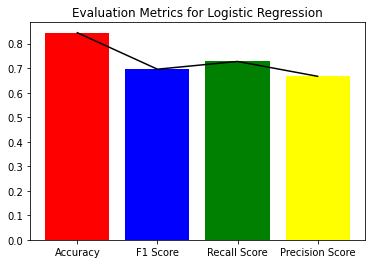

In [95]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],
        [ma_lr,f1_lr,recall_lr,precision_lr],color=['red','Blue','green','Yellow'])
plt.plot([ma_lr,f1_lr,recall_lr,precision_lr],color='black')
plt.title('Evaluation Metrics for Logistic Regression')

In [19]:
print(pd.DataFrame({'Val':Y_test,'Pred':classifier.predict(X_test)}))

     Val  Pred
184    0     0
170    1     0
142    0     0
182    0     0
49     1     1
117    0     0
63     1     0
144    0     0
35     1     1
101    0     0
24     1     1
200    0     0
129    0     0
26     1     1
116    0     0
76     0     0
99     0     0
47     1     1
70     0     0
121    0     0
146    0     0
220    1     1
60     0     1
188    0     0
19     1     0
98     0     0
87     0     0
68     0     0
131    0     0
194    0     1
197    0     0
195    0     0
166    0     0
78     0     0
59     0     1
187    0     0
58     0     1
148    0     0
20     1     1
127    0     0
5      1     1
83     0     0
69     0     0
160    0     0
95     0     0


In [96]:
## Decision Tree Classifier:

from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(max_depth=2)

In [97]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan',
           'symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
## Evaluation of the Model:

pred = np.array(classifier.predict(X_test))

recall_dtc = rs(Y_test,pred)
precision_dtc = ps(Y_test,pred)
f1_dtc = fs(Y_test,pred)
ma_dtc = classifier.score(X_test,Y_test)

In [100]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)
print('Accuracy: ',ma_dtc)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable \n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.5454545454545454
Precision Score:  0.8571428571428571
F1 Score:  0.6666666666666665
Accuracy:  0.8666666666666667

	Table 

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     0


Text(0.5, 1.0, 'Evaluation Metrics for Decision Tree')

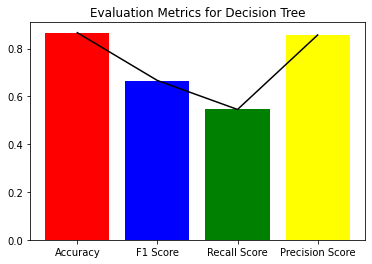

In [102]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_dtc,f1_dtc,recall_dtc,precision_dtc],color=['red','Blue','green','Yellow'])
plt.plot([ma_dtc,f1_dtc,recall_dtc,precision_dtc],color='black')
plt.title('Evaluation Metrics for Decision Tree')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


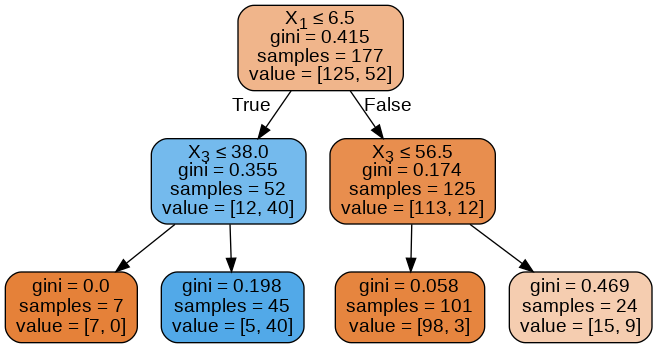

In [26]:
## Decision Tree Visualization:

classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

estimator = classifier
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=250,height=200)

In [103]:
## SVM Classifier:

from sklearn import svm
classifier = svm.SVC()

In [104]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan',
           'symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
## Evaluation of the Model:

pred = np.array(classifier.predict(X_test))

recall_svm = rs(Y_test,pred)
precision_svm = ps(Y_test,pred)
f1_svm = fs(Y_test,pred)
ma_svm = classifier.score(X_test,Y_test)

In [106]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)
print('Accuracy: ',ma_svm)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable \n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.6363636363636364
Precision Score:  0.7
F1 Score:  0.6666666666666666
Accuracy:  0.8444444444444444

	Table 

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Support Vector Machine')

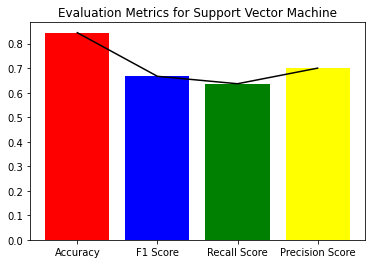

In [112]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],
        [ma_svm,f1_svm,recall_svm,precision_svm],color=['red','Blue','green','Yellow'])
plt.plot([ma_svm,f1_svm,recall_svm,precision_svm],color='black')
plt.title('Evaluation Metrics for Support Vector Machine')

In [107]:
## Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [108]:
X = tdata[['location','country','gender','age','vis_wuhan',
           'from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

In [110]:
## Evaluation of the Model:

pred = np.array(classifier.predict(X_test))

recall_gnb = rs(Y_test,pred)
precision_gnb = ps(Y_test,pred)
f1_gnb = fs(Y_test,pred)
ma_gnb = classifier.score(X_test,Y_test)

In [113]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_gnb)
print('Precision Score: ',precision_gnb)
print('F1 Score: ',f1_gnb)
print('Accuracy: ',ma_gnb)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable \n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.5333333333333333
F1 Score:  0.6153846153846153
Accuracy:  0.7777777777777778

	Table 

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Gaussian Naive Bayes')

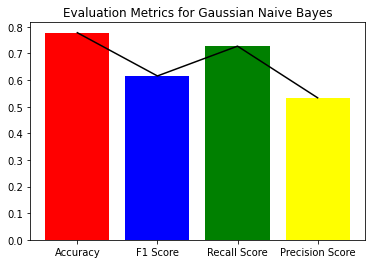

In [114]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],
        [ma_gnb,f1_gnb,recall_gnb,precision_gnb],color=['red','Blue','green','Yellow'])
plt.plot([ma_gnb,f1_gnb,recall_gnb,precision_gnb],color='black')
plt.title('Evaluation Metrics for Gaussian Naive Bayes')

In [115]:
## Boosted Random Forest(Adaboost):
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [116]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier = AdaBoostClassifier(rf,50,0.01,'SAMME.R',10)

In [117]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1',
           'symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                          

In [119]:
## Evaluation of the Model:

pred = np.array(classifier.predict(X_test))

recall = rs(Y_test,pred)
precision = ps(Y_test,pred)
f1 = fs(Y_test,pred)
ma = classifier.score(X_test,Y_test)

In [120]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable \n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Accuracy:  0.9333333333333333

	Table 

     death  pred
130      0     0
203      0     0
170      1     0
66       0     0
181      0     0


Text(0.5, 1.0, 'Evaluation Metrics for Adaboost')

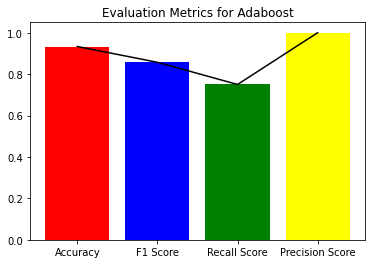

In [130]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],
        [ma,f1,recall,precision],color=['red','blue','green','Yellow'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Adaboost')

In [121]:
## Random Forest with Gradient Boosting:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [122]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier = GradientBoostingClassifier(n_estimators=100)

In [123]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan',
           'symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [125]:
## Evaluation of the Model:

pred = np.array(classifier.predict(X_test))

recall_rfgb = rs(Y_test,pred)
precision_rfgb = ps(Y_test,pred)
f1_rfgb = fs(Y_test,pred)
ma_rfgb = classifier.score(X_test,Y_test)

In [126]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_rfgb)
print('Precision Score: ',precision_rfgb)
print('F1 Score: ',f1_rfgb)
print('Accuracy: ',ma_rfgb)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable \n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.8333333333333334
Precision Score:  1.0
F1 Score:  0.9090909090909091
Accuracy:  0.9555555555555556

	Table 

     death  pred
130      0     0
203      0     0
170      1     1
66       0     0
181      0     0


Text(0.5, 1.0, 'Evaluation Metrics for Gradient Boosting')

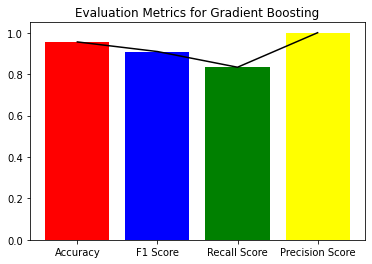

In [128]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],
        [ma_rfgb,f1_rfgb,recall_rfgb,precision_rfgb],color=['red','blue','green','Yellow'])
plt.plot([ma_rfgb,f1_rfgb,recall_rfgb,precision_rfgb],color='black')
plt.title('Evaluation Metrics for Gradient Boosting')

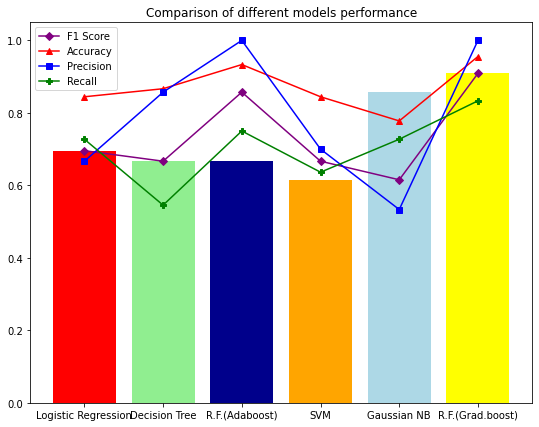

In [136]:
## Comparison of Evaluation Metrics for different Models:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,7))
plt.bar(['Logistic Regression','Decision Tree','R.F.(Adaboost)',
         'SVM','Gaussian NB','R.F.(Grad.boost)'],
        [f1_lr,f1_dtc,f1_svm,f1_gnb,f1,f1_rfgb],color=['red','lightgreen','darkblue','orange','lightBlue','Yellow'])
plt.plot(['Logistic Regression','Decision Tree','R.F.(Adaboost)',
          'SVM','Gaussian NB','R.F.(Grad.boost)'],
         [f1_lr,f1_dtc,f1,f1_svm,f1_gnb,f1_rfgb],color='purple',marker='D')
plt.plot(['Logistic Regression','Decision Tree','R.F.(Adaboost)',
          'SVM','Gaussian NB','R.F.(Grad.boost)'],
         [ma_lr,ma_dtc,ma,ma_svm,ma_gnb,ma_rfgb],color='red',marker='^')
plt.plot(['Logistic Regression','Decision Tree','R.F.(Adaboost)',
          'SVM','Gaussian NB','R.F.(Grad.boost)'],
         [precision_lr,precision_dtc,precision,precision_svm,precision_gnb,precision_rfgb],color='blue',marker='s')
plt.plot(['Logistic Regression','Decision Tree','R.F.(Adaboost)',
          'SVM','Gaussian NB','R.F.(Grad.boost)'],
         [recall_lr,recall_dtc,recall,recall_svm,recall_gnb,recall_rfgb],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of different models performance')

plt.show(fig)